# Exercise 1

In [474]:
import numpy as np
import matplotlib.pyplot as plt

## 1.4

In [10]:
# 1. Set up
class struct():
    pass

# T = 2

In [ ]:
# 1. Set up
par = struct()
par.alpha = 0.5
par.beta = 0.9
par.T = 2

# Utility function
par.u = lambda x, par: x**par.alpha
# 2. State
par.M = 5

In [13]:
# 3. Solve for T = 2
Vstar = -np.inf
Cstar = [0 for x in range(par.T)]

for C1 in range(0,par.M + 1):       
        #a. Evaluate
        V = par.u(C1, par) + par.beta * par.u(par.M - C1, par)
        
                #b. Save max
        if V > Vstar:
            Vstar = V
            Cstar[0] = C1
            
            Cstar[1] = par.M - C1
            
        
print('Optimal consumption is',Cstar, 'with value function', Vstar)


Optimal consumption is [3, 2] with value function 3.004843013704663


# T = 3

In [20]:
# 1. Set up
par = struct()
par.alpha = 0.5
par.beta = 0.9
par.T = 3
# Utility function
par.u = lambda x, par: x**par.alpha
# 2. State
par.M = 5

In [22]:
# Solve
Vstar = -np.inf
Cstar = [0 for x in range(par.T)]

for C2 in range(0,par.M + 1):
    for C1 in range(0, par.M - C2):
        
        # a. Evaluate
        V = par.u(C2, par) + par.beta * par.u(C1,par) + (par.beta)**2 * par.u(par.M-C2-C1,par)
        
        # b. Save max
        if V > Vstar:
            Vstar = V
            Cstar[0] = C1
            Cstar[1] = C2
            Cstar[2] = par.M - C1 - C2
            

print('Optimal consumption is',Cstar, 'with value function', Vstar)

Optimal consumption is [2, 2, 1] with value function 3.4970057685088807


# Backwards Induction

In [496]:
# 1. Set up
par = struct()
par.alpha = 0.5
par.beta = 0.70
par.T = 10
# Utility function
par.u = lambda x, par: x**par.alpha
# 2. State
par.M = 5

In [500]:
# Solve
Cstar, Vstar = dict(), dict()

# Initialize end period
Cstar[par.T] = np.arange(par.M+1)
Vstar[par.T] = par.u(Cstar[par.T], par)

for t in reversed(range(1,par.T)):
    Cstar[t] = np.zeros(par.M+1)
    Vstar[t] = np.zeros(par.M+1)
    
    for m in range(0, par.M+1): # 0 to 5
        Vstar[t][m] = -np.inf 
        
        for C in range(m+1): # 0 to m
            V = par.u(C, par) + par.beta * Vstar[t+1][m-C]
            if V > Vstar[t][m]:
                Vstar[t][m] = V
                Cstar[t][m] = C 

# Simulate $C_1,... C_{10}$ with $M = 5$ and $T = 10$

In [501]:
C = np.zeros(par.T)
C[0] = Cstar[1][par.M]

for i in range(1,par.T):
    tot_C = sum(C)
    C[i] = Cstar[i+1][int(par.M - tot_C)]

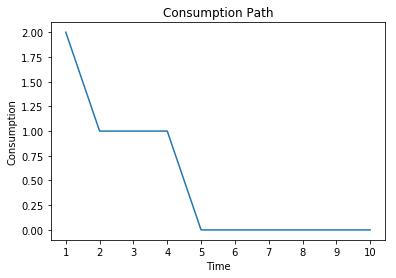

In [502]:
plt.figure()
x = np.linspace(1,10,10)
plt.plot(x,C)
plt.title('Consumption Path'); plt.ylabel('Consumption'); plt.xlabel('Time'); plt.xticks(range(1,11))
plt.show()